## Cord

Try training layoutlm to extract parts after OCR

In [56]:
import collections
import os
import json
from PIL import Image
from pathlib import Path
from uuid import uuid4

from typing import List

import cv2
import easyocr
import matplotlib.pyplot as plt
import pytesseract

from experiment_utils.constants import *

In [64]:
device = 'cuda'

In [65]:
model =  easyocr.Reader(
            lang_list=['en'],
            gpu=True if 'cuda' in device else False,
            download_enabled=True,
            detector=True,
            recognizer=True)

In [37]:
receipt_samples_dir = DATA_DIR / 'cord-v2/data/files/CORD-1k-001/CORD/train/image'

In [71]:
sample_batch = [x.absolute().as_posix() for x in list(receipt_samples_dir.glob('*.png'))[:5]]

In [75]:
OCRResult = collections.namedtuple('OCRResult', ['bbox', 'text', 'confidence_score'])

In [74]:
%%time
ocr_results = []

for sample in sample_batch:
    result = model.readtext(sample)
    ocr_results.append([OCRResult(bbox=bbox, text=text, confidence_score=confidence_score) for bbox, text, confidence_score in result])

CPU times: user 2.73 s, sys: 170 ms, total: 2.9 s
Wall time: 2.75 s


In [91]:
def draw_bbox(image_path: str, ocr_results: List[OCRResult], confidence_threshold=0.5):
    img = cv2.imread(image_path)
    
    for bbox, text, confidence_score in ocr_results:
        if confidence_score < confidence_threshold:
            continue
        top_left = tuple(int(x) for x in bbox[0])
        bottom_right = tuple(int(x) for x in bbox[2])
        font = cv2.FONT_HERSHEY_SIMPLEX
        img = cv2.rectangle(img,top_left,bottom_right,(0,0,255))
        img = cv2.putText(img,text,bottom_right, font, 0.5,(0,255,0),2,cv2.LINE_AA)
        
    plt.figure(figsize=(10,10))
    plt.imshow(img)
    plt.show()

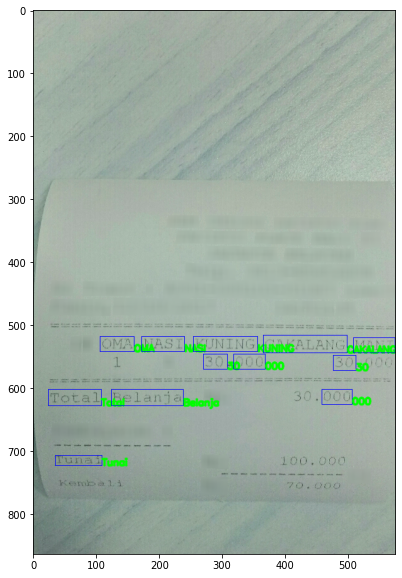

In [92]:
draw_bbox(sample_batch[0], ocr_results[0])

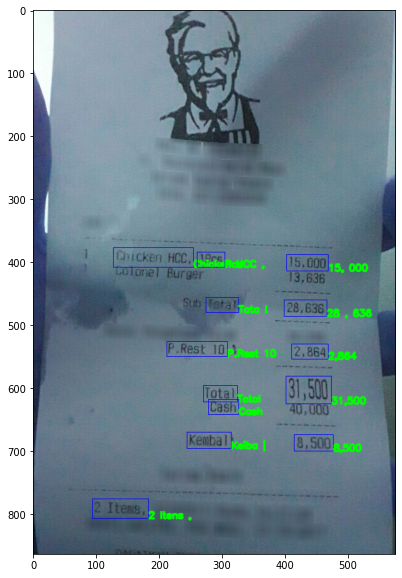

In [78]:
draw_bbox(sample_batch[1], ocr_results[1])

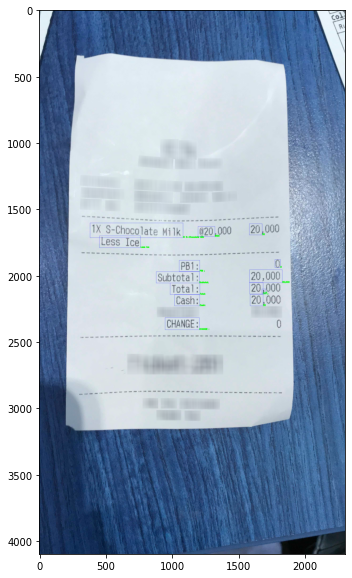

In [83]:
draw_bbox(sample_batch[2], ocr_results[2])

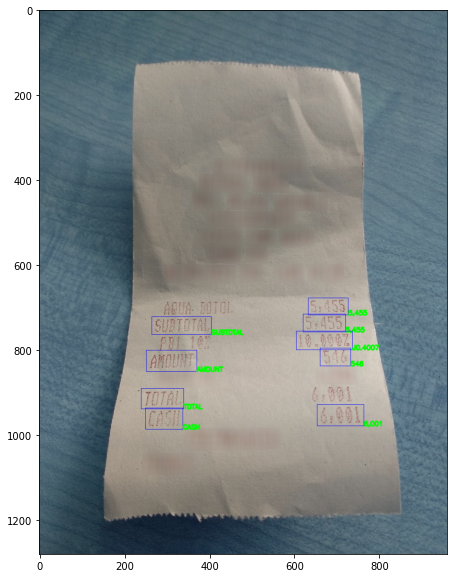

In [84]:
draw_bbox(sample_batch[3], ocr_results[3])

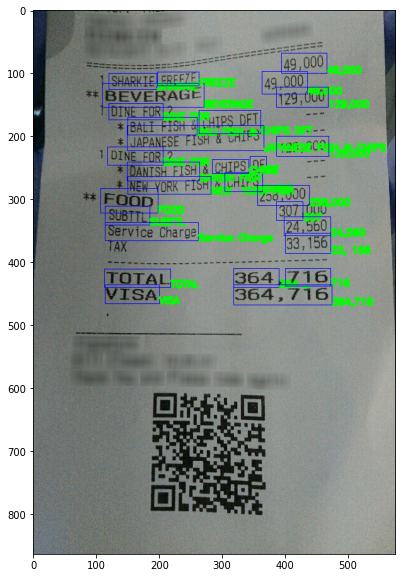

In [94]:
draw_bbox(sample_batch[4], ocr_results[4])

In [93]:
ocr_results[4]

[OCRResult(bbox=[[394, 68], [466, 68], [466, 100], [394, 100]], text='49,000', confidence_score=0.9936128785797855),
 OCRResult(bbox=[[120, 100], [196, 100], [196, 126], [120, 126]], text='SHARKIE', confidence_score=0.9986713931747884),
 OCRResult(bbox=[[363, 97], [435, 97], [435, 133], [363, 133]], text='49,000', confidence_score=0.9984964712593346),
 OCRResult(bbox=[[110, 116], [271, 116], [271, 154], [110, 154]], text='BEVERAGE', confidence_score=0.9997514472389691),
 OCRResult(bbox=[[386, 122], [468, 122], [468, 154], [386, 154]], text='129,000', confidence_score=0.9989971418760243),
 OCRResult(bbox=[[120, 148], [206, 148], [206, 174], [120, 174]], text='DINE FOR', confidence_score=0.9868015364437377),
 OCRResult(bbox=[[150, 170], [260, 170], [260, 198], [150, 198]], text='BALI FISH &', confidence_score=0.9748531785764333),
 OCRResult(bbox=[[263, 159], [361, 159], [361, 196], [263, 196]], text='CHIPS DFT', confidence_score=0.9932102405008144),
 OCRResult(bbox=[[149, 183], [366, 183